<a href="https://colab.research.google.com/github/RefaelAharouni/Project_Machine_Learning_Refael_Venkatsai_Norbert_William/blob/Refa%C3%ABl/Project_Machine_Learning_Refael_Venkatsai_Norbert_William.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aharouni Refaël, Kadari Venkatsai, Devaraj Norbert Dias, Aye William $-$ DIA1
<br><br>

<p align="center"><b> Report of the Machine Learning Project</b></p><br><br>




&nbsp;&nbsp;&nbsp;In this dataset, we want to study the relationship between the presence of diabetes for patients and features like the patient's age, his geographical location, his potential heart diseases and level of blood glucoses for example. Therefore, this problem is a binary classification one (we want to know if the patient has a diabete (the target feature) or not, given his personal information).

&nbsp;&nbsp;&nbsp;&nbsp;Let us first import the libraries that will be used for this project. We can then read the the dataset with the *pd.read_csv* method and store it in the *data* variable.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import (confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report)

In [ ]:
data = pd.read_csv("diabetes_dataset.csv", sep = ",")

Now, we can print the first lines of the dataset to see what it looks like using *head* method.

In [ ]:
data.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


<br><br>

# **1. Analysis and preprocessing of the data**

&nbsp;&nbsp;&nbsp;&nbsp;Let us begin this project by analyzing the data.
<br>
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**A. Variables definition**
&nbsp;&nbsp;&nbsp;The first thing to do is understanding the variables that we are dealing with in this dataset using the *columns.tolist()* method.

In [ ]:
print(data.columns.tolist())

['year', 'gender', 'age', 'location', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']


&nbsp;&nbsp;&nbsp;From the previous result, we can draw up a list of the features and their type:

*   **Year**: This feature represents the year during which the test has been done on the patient. At first glance, we could think that this variable is *quantitative continuous* because in theory, it can take an infinite number of values. However, after using the command: "len(data["year"].value_counts())", we saw that there were only 7 different values taken for this feature, which is largely smaller than 100 000, the number of individuals. Therefore, this variable can be considered as *quantitative discrete*. <br><br>

*   **Gender:** This feature represents the gender of the patient, so it is a *qualitative nominale* variable (the possible values are: "male", "female" or "other"). <br><br>

*   **Age:** This feature is *quantitative discrete*, just as the "year" one (even if, once again, it can take every value between 0 and 150).<br><br>

*   **Location:** This variable represents the location of the patient (the American state of the patient). Therefore, this variable is *qualitative nominale*.<br><br>

*   **race:AfricanAmerican**, **race:Asian**, **race:Caucasian**, **race:Hispanic**, **race:Other**: Those variables indicate if the patient is African/American or not, Asian or not, Caucasian or not, Hispanic or not, or other (or not). Therefore, they are *quantitative binary*. <br><br>

*  **hypertension**: Quantitative binary as it indicates if the patient is in hypertension or not (1 --> Hypertension, 0 --> no hypertension)<br><br>

*  **heart_disease:** Quantitative binary as it indicates if the patient has a heart disease or not (1 --> heart_disease, 0 --> no heart_disease). <br><br>

*  **smoking_history:** Qualitative ordinal because it indicates the patient's smoking frequency (with a hierarchy). The possible values are: "never" (level 0), "not current" (level 1), "former" (level 2), "ever" (level 3), "current" (level 4).<br><br>

*  **bmi:** This variable represents the ratio between the patient's weight and his height squared. Because it can take an infinite number of values, it is a *quantitative continuous* feature. <br><br>

*  **hbA1c_level:** *Quantitative continuous* as it represents the hemoglobin percentage of sugar in the blood <br><br>

*  **blood_glucose_level:** *Quantitative continuous* as it takes an infinite number of values (it is expressed in mg/dL). <br><br>

*  **diabetes:** *Quantitative binary* as it indicates if the patient has a diabete or not (1 --> Diabete, 0 --> No diabete).

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**B. Number of columns, rows and values**

&nbsp;&nbsp;&nbsp;In order to know the exact number of columns and rows, we can use the *.shape* method. The first argument will be the number of lines (number of individuals) while the second one will represent the number of columns (number of features).

In [ ]:
data.shape

(100000, 16)

Therefore, our dataset contains 100 000 individuals and 16 features. Using the *size* function allows us to know that our diabetes dataset contains 160 000 values, which is normal because we have 100 000 individuals and 16 features.

In [ ]:
data.size

1600000

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**C. Missing values, inconsistencies and outliers**

&nbsp;&nbsp;&nbsp;Let us now use *.info* and *.isnull.sum()* to see if our dataset contains any missing values.

In [ ]:
print(data.info())
print("\nNumber of missing values for each feature:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

From what we can see, this dataset does not seem to contain any missing values. <br>We also need to ensure that diabetes_dataset.csv does not have any inconsistencies. This step implies to look at the potential spelling mistakes, incoherent spaces or incoherent uppercases for the qualitative columns.

Let us look at the values taken by each qualitative feature with the *data[name_feature].value_counts()* method, knowing from the *info* method precedently used that all qualitative features are "object" in our dataset.

In [ ]:
for j in data.select_dtypes(include = ["object"]).columns: # We select the qualitative columns and print the occurrencies of every value taken by each feature
  print(data[j].value_counts(), "\n\n")

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64 


location
Kentucky                2038
Iowa                    2038
Hawaii                  2038
Nebraska                2038
Florida                 2037
Minnesota               2037
Arkansas                2037
New Jersey              2037
Massachusetts           2036
Kansas                  2036
Louisiana               2036
District of Columbia    2036
Maine                   2036
Delaware                2036
Georgia                 2036
Michigan                2036
Illinois                2036
Pennsylvania            2036
Oregon                  2036
Alabama                 2036
Connecticut             2035
Maryland                2035
Alaska                  2035
North Dakota            2035
New York                2035
North Carolina          2035
Mississippi             2035
Rhode Island            2035
Colorado                2035
Missouri                2035
New Hampshire           2035
New Mexi

No spelling mistakes or additional spaces appear in our dataset. <br>However, even if it did not seem so at first glance, "smoking_history" contains more than 35 800 null values (that were registered as "No Info") and  will be treated once we will use one-hot encoder. For this feature, let us also use *map* function to rename the values taken and make them begin with uppercases. To make sure of the renaming, we can once again print the occurrencies of this feature's values using *.value_counts()* method.

In [ ]:
data["smoking_history"] = data["smoking_history"].map({"No Info": "No Info", "never": "Never", "former": "Former", "current": "Current", "not current": "Not Current", "ever": "Ever"})
data["smoking_history"].value_counts()

,count
smoking_history,
No Info,35816
Never,35095
Former,9352
Current,9286
Not Current,6447
Ever,4004


<br><br>
&nbsp;&nbsp;&nbsp;Let us now evaluate the possible inconsistencies for quantitative features. For example, let us verify that:
* Every patient's age is between 0 and 122 (the official human longevity record is held by Jeanne Louise Calment, who lived 122 years and 164 days, according to Statista).
* Every patient's BMI is between 6.7 kg/m$^2$ and 98 kg/m$^2$ (the highest BMI ever registered was 98 kg/m$^2$ according to the article of PreciDIAB's website, while the lowest was 6.7 kg/m$^2$ according to Psychiatria Polska's article).
* Every patient's blood glucose level is between 40 mg/dL and 600 mg/dL (according to Guideline Central's article, a blood glucose level greater than 600 mg/dL is very serious while American Diabetes Association tells us that a blood glucose level below 70 is characteristic of a diabetic patient).
* Every patient's hbA1c is between 0% and 20%.
* Every year in the dataset is between 1900 and 2025 as it represents the year where the diabete test has been done on the patients.

In [ ]:
print("Inconsistent ages: ", data[(data["age"] < 0) | (data["age"] > 122)])
print("Inconsistent years: ", data[(data["year"] < 1900) | (data["year"] > 2025)])
print("Inconsistent BMI: ", data[(data["bmi"] < 6.7) | (data["bmi"] > 98)])
print("Inconsistent blood glucose level: ", data[(data["blood_glucose_level"] < 40) | (data["blood_glucose_level"] > 600)])
print("Inconsistent hbA1C level: ", data[(data["hbA1c_level"] < 0) | (data["hbA1c_level"] > 20)])

Inconsistent ages:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes]
Index: []
Inconsistent years:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes]
Index: []
Inconsistent BMI:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes]
Index: []
Inconsistent blood glucose level:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level

Therefore, no inconstency seems to appear in our dataset.
<br><br><br>&nbsp;&nbsp;&nbsp;To go further in our analysis, let us display the boxplot of every quantitative feature to see what the outliers in our dataset are (the outliers are the points that are out of the whiskers).

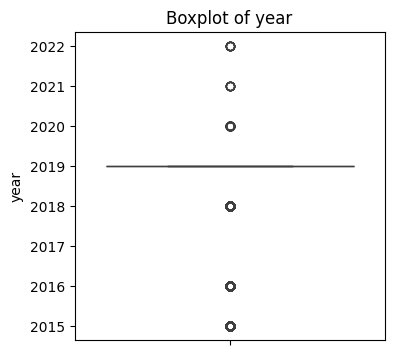

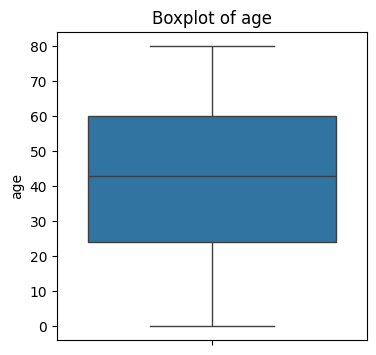

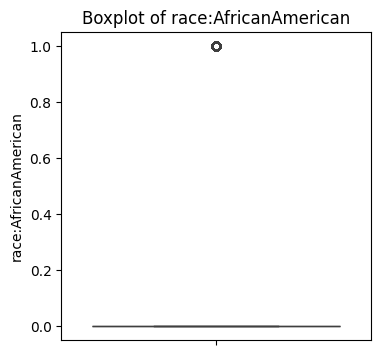

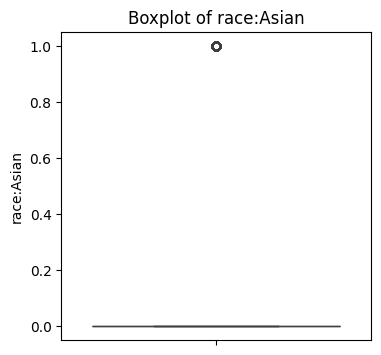

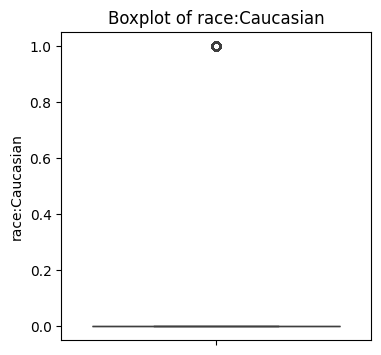

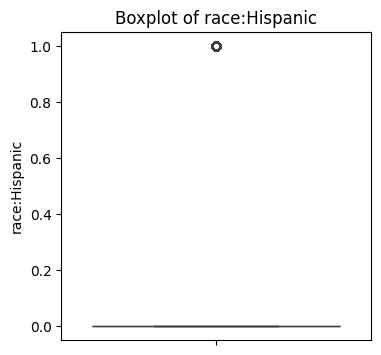

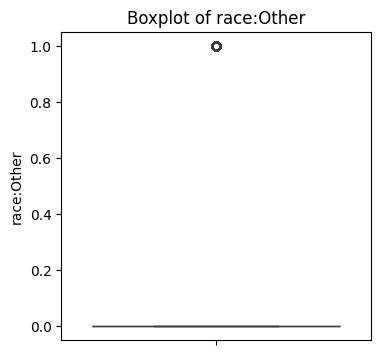

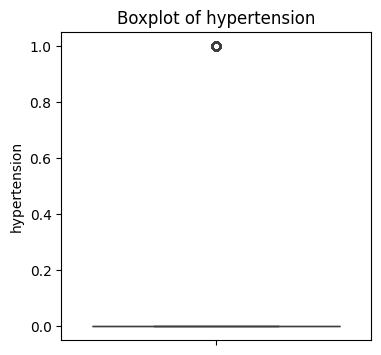

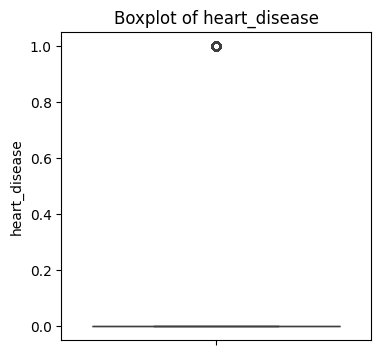

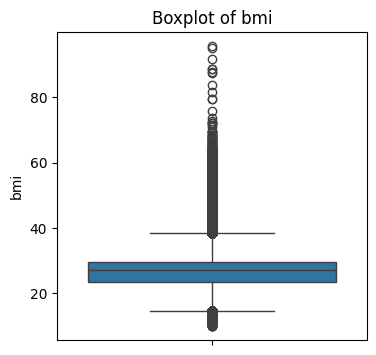

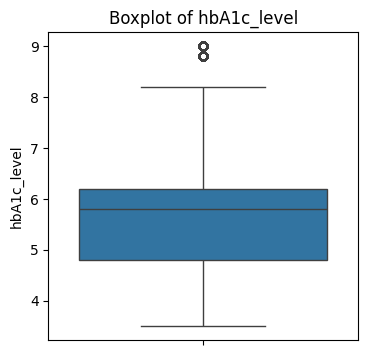

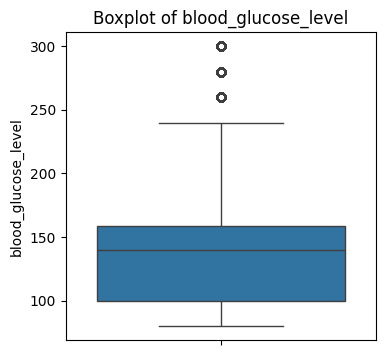

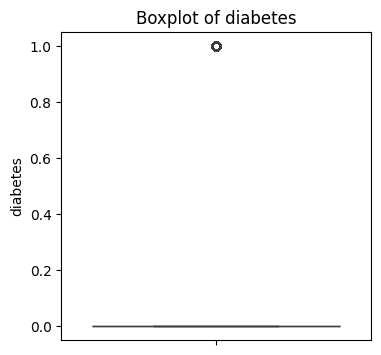

In [ ]:
for j in data.select_dtypes(include = ["int64", "float64"]).columns: # We select the quantitative features
  plt.figure(figsize = (4, 4)) # Creation of a new figure
  sns.boxplot(data[j]) # Display of boxplot
  plt.title(f"Boxplot of {j}")
  plt.show()

From what one can see here:
* The feature "Year" has some outliers, but this is because more than 75% of patients had their test in 2019 (hence, all the other values are considered as outliers). However, all values are between 2015 and 2022, so none of them is really "extreme". <br>
* The feature "age" does not have any extreme values. <br>
* For the binary features, like "race:Asian", "race:AfricanAmerican", "race:Caucasian", "race:Hispanic", "hypertension", "heart_disease" and "diabetes", 1 is always considered as an outlier. This is because the dataset is imbalanced for every one of this feature. <br>
* The "BMI" feature contains a lot of outliers, as there are many people that have a BMI greater than 40 (morbid obesity), but also patients that have a BMI less than 15 (severe malnutrition).<br>
* The features concerning the blood glucose level and hbA1c level also have 2-3 outliers, as some points are to be seen after 250 mg/dL for the blood glucose and after 8.5% for the hbA1c.

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**D. Duplicated values**

&nbsp;&nbsp;&nbsp;Knowing if our dataset contains duplicated values is also useful and can be done through *data[data.duplicated()]* code. We can also use *duplicated.sum()* method to know the exact number of duplicates.

In [ ]:
print(f"There are {data.duplicated().sum()} duplicated values that are:")
data[data.duplicated()]

There are 14 duplicated values that are:


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
2848,2019,Male,40.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,6.2,85,0
21662,2019,Male,65.0,Georgia,0,1,0,0,0,0,0,No Info,27.32,4.0,90,0
23313,2019,Female,21.0,Guam,0,1,0,0,0,0,0,Never,27.32,6.6,155,0
33506,2019,Male,13.0,Iowa,0,1,0,0,0,0,0,No Info,27.32,4.8,160,0
43401,2019,Male,46.0,Maryland,0,1,0,0,0,0,0,Never,27.32,6.6,90,0
57881,2019,Female,62.0,Nebraska,1,0,0,0,0,0,0,No Info,27.32,4.0,126,0
59507,2019,Male,14.0,Nevada,0,1,0,0,0,0,0,No Info,27.32,6.5,200,0
61867,2019,Female,11.0,New Hampshire,0,1,0,0,0,0,0,No Info,27.32,6.6,85,0
65311,2019,Female,80.0,New Mexico,1,0,0,0,0,0,0,No Info,27.32,5.7,159,0
71285,2019,Female,80.0,North Dakota,0,0,1,0,0,0,0,No Info,27.32,5.8,126,0


Given the fact that we have 100 000 individuals in this dataset, removing 14 individuals won't have have a huge impact on the dataset. Therefore, we can simply delete those lines using *drop_duplicates()* function.

In [ ]:
data = data.drop_duplicates()

To make sure that those lines were really deleted, let us use once again the *shape* method to display the number of lines (individuals) and columns (features).

In [ ]:
data.shape

(99986, 16)

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**E. Visualization**

In [ ]:
print(data.describe)

<bound method NDFrame.describe of        year  gender   age location  race:AfricanAmerican  race:Asian  \
0      2020  Female  32.0  Alabama                     0           0   
1      2015  Female  29.0  Alabama                     0           1   
2      2015    Male  18.0  Alabama                     0           0   
3      2015    Male  41.0  Alabama                     0           0   
4      2016  Female  52.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99995  2018  Female  33.0  Wyoming                     0           0   
99996  2016  Female  80.0  Wyoming                     0           1   
99997  2018    Male  46.0  Wyoming                     0           1   
99998  2018  Female  51.0  Wyoming                     1           0   
99999  2016    Male  13.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0                   

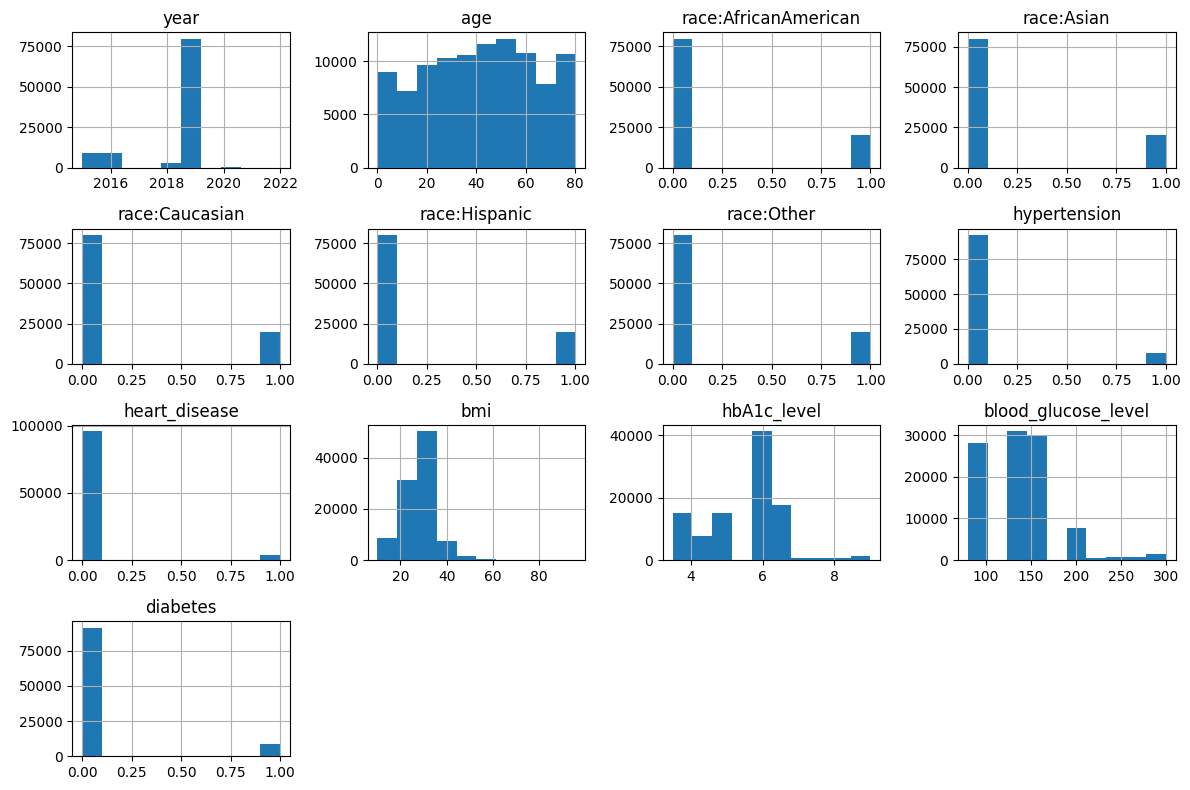

In [ ]:
# Visualize numeric distributions
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**F. Data balance**

&nbsp;&nbsp;&nbsp;Let us now continue our analysis and preprocessing of the dataset by observing the balance of the feature "diabetes". This process will help us to know which models and pipelines will be used later.
<br>&nbsp;&nbsp;&nbsp;First, let us use once again *value_counts()* method to print the number of occurrences of both classes (0 and 1) for the target feature: "diabetes".
<br>&nbsp;&nbsp;&nbsp;We can also use *min* and *max* functions to calculate the ratio between the minority class and the majority one.  

In [ ]:
print(data["diabetes"].value_counts())
minority = data["diabetes"].value_counts().min()
majority = data["diabetes"].value_counts().max()
ratio = majority / minority
print(f"Imbalance ratio ≈ 1:{ratio:.2f}")

diabetes
0    91486
1     8500
Name: count, dtype: int64
Imbalance ratio ≈ 1:10.76


From what one can see here, the majoritarian class is the 0 (representing the patients without diabete), while the minority class is the 1 (representing the patients with diabete).<br>
The fact that there are 10.76 times more patients without diabete than patients with diabete proves that this feature is highly imbalanced. To counter this imbalance, some models like RandomOverSampling or SMOTE will be used later.

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**G. Correlation analysis and encoding**

&nbsp;&nbsp;&nbsp;In this part, we will study the correlation between the different features and use encoding to split qualitative features into dummies ones (quantitative binary).
<br>&nbsp;&nbsp;&nbsp;Let us first display the correlation matrix to see which variables are independent (correlation far from $\pm1$) from the others and which ones directly depend from one another (correlation close to $\pm1$).

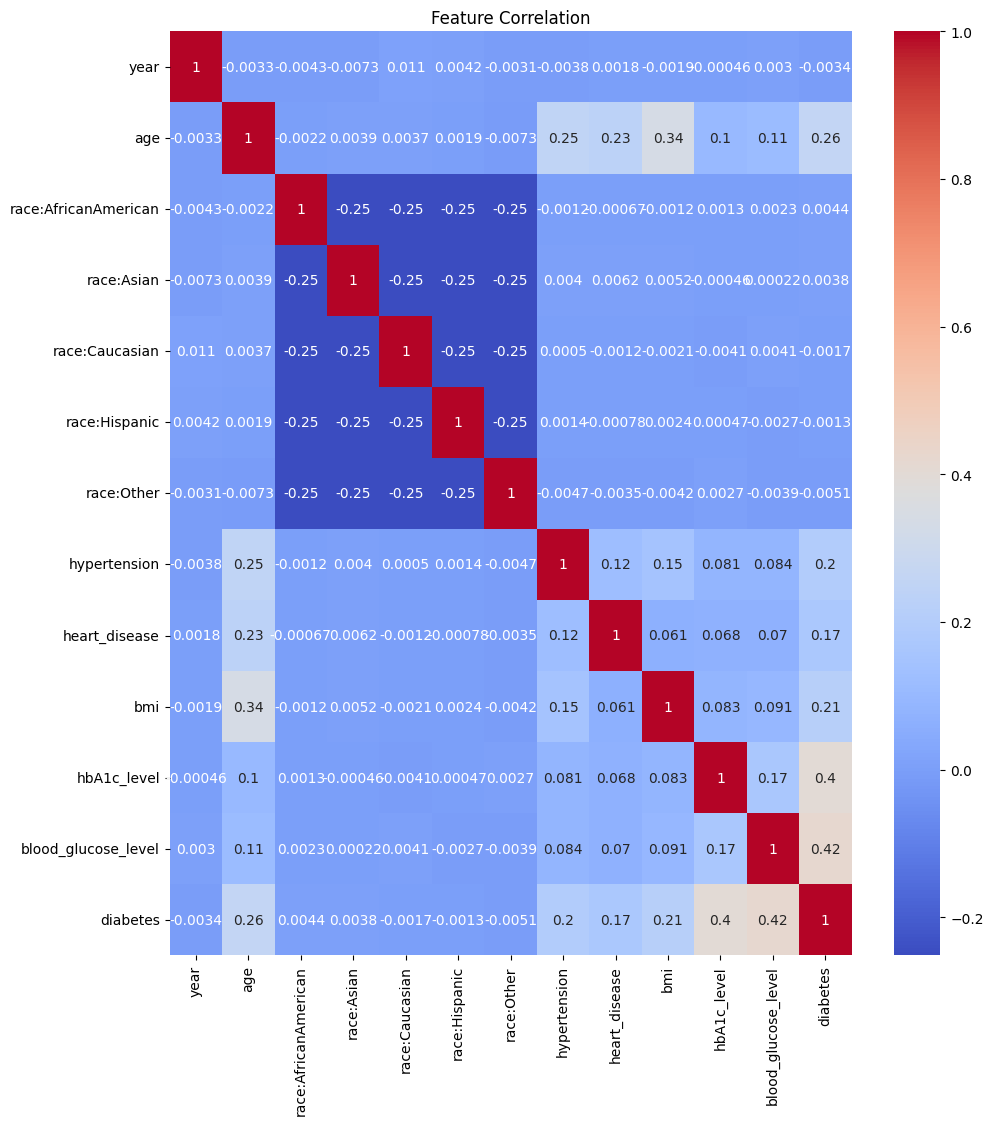

In [ ]:
plt.figure(figsize=(11, 12)) # Creation of the figure that will represent the correlation matrix
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm') # We keep only quantitative variables and print the correlation matrix
plt.title("Feature Correlation")
plt.show()

If we look at the last line of this matrix, we can see that the features the most correlated to "diabetes" are:
* blood_glucose_level (correlation of 0.42)
* hbA1c_level (correlation of 0.4)
* age (correlation of 0.26)
However, the relationship between those variables and diabete is slight and qualitative features don't appear in the matrix.
<br>To resolve this problem, let us transform the qualitative features into quantitative binary features using *pd.get_dummies* function. To make sure that the new features will take 0/1 values instead of "True"/"False", we can add the parameter: *dtype = int* at the end of the *get_dummies* function.


In [ ]:
data_encoded = pd.get_dummies(data, columns = data.select_dtypes(include = "object").columns, drop_first=True, dtype = int)
data_encoded.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,location_Virginia,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming,smoking_history_Ever,smoking_history_Former,smoking_history_Never,smoking_history_No Info,smoking_history_Not Current
0,2020,32.0,0,0,0,0,1,0,0,27.32,...,0,0,0,0,0,0,0,1,0,0
1,2015,29.0,0,1,0,0,0,0,0,19.95,...,0,0,0,0,0,0,0,1,0,0
2,2015,18.0,0,0,0,0,1,0,0,23.76,...,0,0,0,0,0,0,0,1,0,0
3,2015,41.0,0,0,1,0,0,0,0,27.32,...,0,0,0,0,0,0,0,1,0,0
4,2016,52.0,1,0,0,0,0,0,0,23.75,...,0,0,0,0,0,0,0,1,0,0


Let us now see the new number of columns (features) and lines (individuals) using the *shape* function.

In [ ]:
data_encoded.shape

(99986, 74)

As one can see, approximately 60 new features appeared, and we now have 99 986 individuals and 74 features.
<br>Because all the features are now quantitative, we can once again print the correlation matrix. To simplify the display, we will apply a filter: we will only keep the line of diabetes (because for the moment, only the relationships between the diabetes and the other features are important) and the features that have an absolute correlation of more than 0.25 with diabetes.

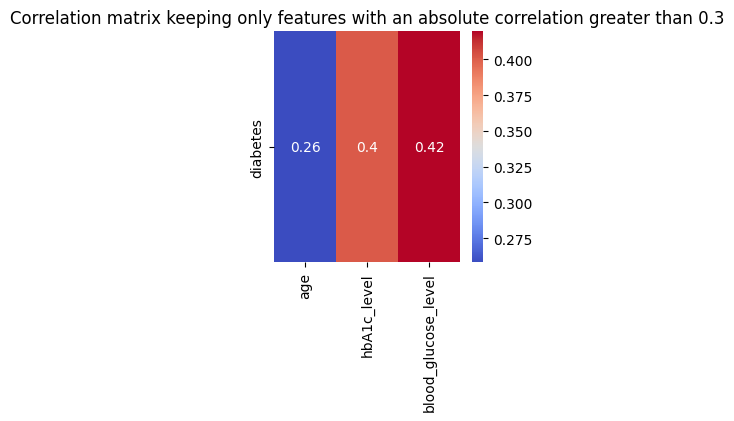

In [ ]:
matrix = data_encoded.corr(numeric_only = True)
matrix_temp = matrix["diabetes"].drop("diabetes") # We delete the cell showing the relationship between diabetes and itself (useless)
matrix_filtered = matrix_temp[abs(matrix_temp) > 0.25] # We filter the matrix to keep the features having an absolute value correlation with diabetes greater than 0.25
plt.figure(figsize = (3, 3))
sns.heatmap(matrix_filtered.to_frame().T, annot = True, cmap = 'coolwarm') # We convert the matrix into a dataframe and print its transpose to have an horizontal result.
plt.title("Correlation matrix keeping only features with an absolute correlation greater than 0.3")
plt.show()

From this final correlation matrix, we understand that the variables the most correlated to "diabetes" are the blood glucose level (correlation of 0.42), then the hbA1c_level (correlation of 0.4) and finally the age (0.26).
<br>However, once again, those correlations with diabetes remain slight (for hba1c_level and blood_glucose_level) or even weak (for age).

<br><br>

# **2. Data normalization and reduction**

<br><br>

# **3. Train_test_split and implementation of algorithms and pipelines**

&nbsp;&nbsp;&nbsp;As we saw in the first part, the dataset's feature target is "diabetes", while the other features are explicative ones. This is the reason why the feature "diabetes" will be called *y* while the others will be grouped in a variable called *X*.

In [ ]:
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']

We can now use *train_test_split* function with a *test_size* of 0.3 to split our dataset into a training set and a test set. Because our dataset is moderately imbalanced (ratio $\approx$ 11 as we saw before), we can add the parameter *stratify = y* to keep the same class proportions.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the separation between the training and the test has been done, we can develop some models to predict if a patient has diabete or not. Before beginning, let us define a function

In [ ]:
# Define a dictionary of models to compare
models = {
    # Logistic Regression: a linear model that estimates probabilities using a logistic function.
    # max_iter=1000 ensures the solver has enough iterations to converge.
    # random_state=42 ensures reproducibility of results.
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),

    # Decision Tree: a non-linear model that splits data into branches based on feature values.
    # random_state=42 ensures consistent tree structure across runs.
    "Decision Tree": DecisionTreeClassifier(random_state=42),

    # Random Forest: an ensemble of decision trees that improves accuracy and reduces overfitting.
    # random_state=42 ensures reproducibility of the forest structure.
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [ ]:
# Train baseline models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"\n{name} Performance:")
    from sklearn.metrics import classification_report
    print(classification_report(y_test, model.predict(X_test)), "\n\n")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27446
           1       0.87      0.63      0.73      2550

    accuracy                           0.96     29996
   macro avg       0.92      0.81      0.85     29996
weighted avg       0.96      0.96      0.96     29996


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27446
           1       0.72      0.74      0.73      2550

    accuracy                           0.95     29996
   macro avg       0.85      0.85      0.85     29996
weighted avg       0.95      0.95      0.95     29996


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27446
           1       0.99      0.67      0.80      2550

    accuracy                           0.97     29996
   macro avg       0.98      0.83     

# STEP 3: Handle Class Imbalance with SMOTE

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({0: 64040, 1: 64040})


In [ ]:
# Retrain Random Forest on resampled data
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_resampled, y_resampled)
print("\nRandom Forest (SMOTE) Performance:")
print(classification_report(y_test, rf_balanced.predict(X_test)))


Random Forest (SMOTE) Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27446
           1       0.90      0.69      0.78      2550

    accuracy                           0.97     29996
   macro avg       0.93      0.84      0.88     29996
weighted avg       0.97      0.97      0.96     29996



<br><br>

# **4. Analysis of the results and management of the overfitting**


=== Random Forest (Baseline) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27446
           1       0.99      0.67      0.80      2550

    accuracy                           0.97     29996
   macro avg       0.98      0.83      0.89     29996
weighted avg       0.97      0.97      0.97     29996

Confusion Matrix:
[[27432    14]
 [  848  1702]]
AUC (ROC): 0.957 | AUC (PR): 0.856


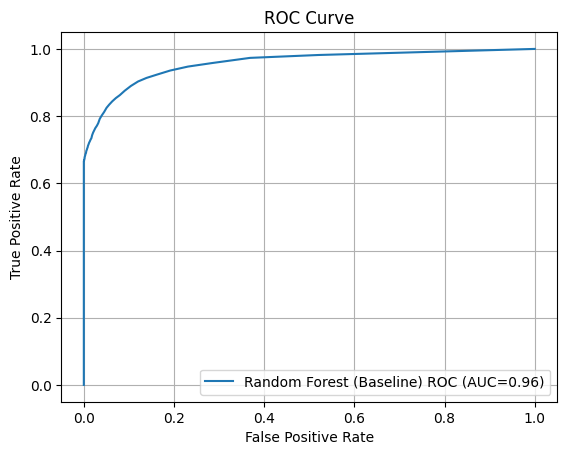

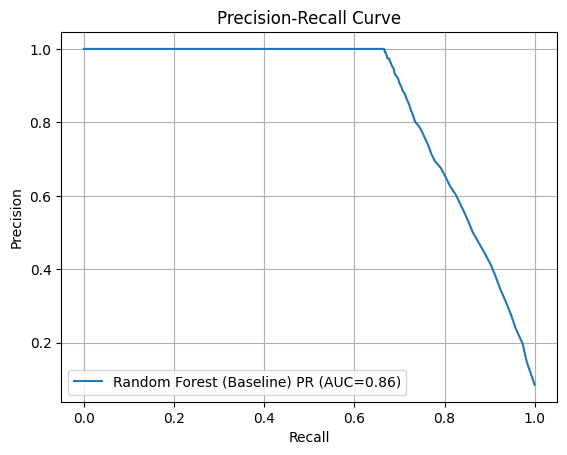


=== Random Forest (SMOTE) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27446
           1       0.90      0.69      0.78      2550

    accuracy                           0.97     29996
   macro avg       0.93      0.84      0.88     29996
weighted avg       0.97      0.97      0.96     29996

Confusion Matrix:
[[27247   199]
 [  794  1756]]
AUC (ROC): 0.961 | AUC (PR): 0.848


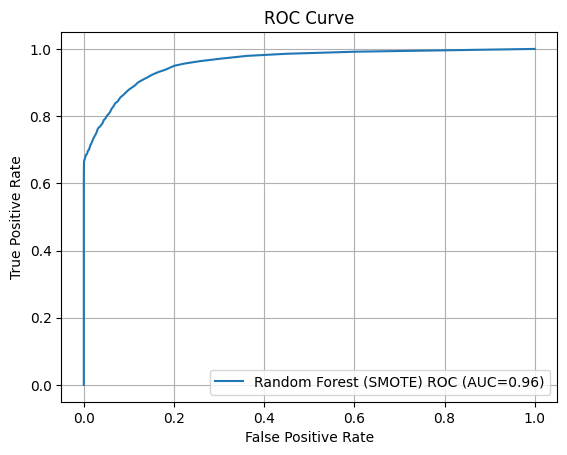

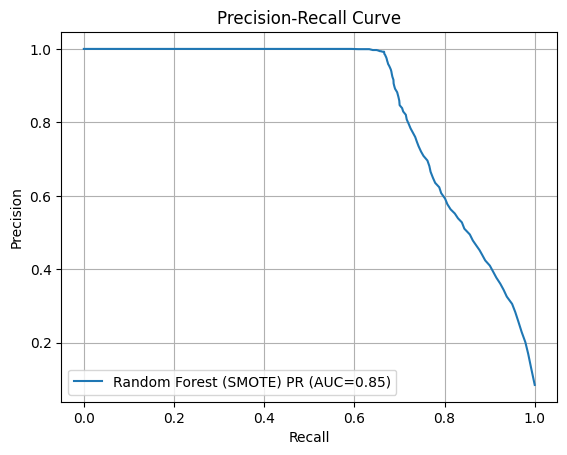

Custom Cost (Baseline): 8494
Custom Cost (SMOTE): 8139


In [ ]:
def evaluate_model(model, X_test, y_test, label="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    auc_roc = auc(fpr, tpr)
    auc_pr = auc(recall, precision)

    print(f"\n=== {label} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"AUC (ROC): {auc_roc:.3f} | AUC (PR): {auc_pr:.3f}")

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f"{label} ROC (AUC={auc_roc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Precision-Recall
    plt.figure()
    plt.plot(recall, precision, label=f"{label} PR (AUC={auc_pr:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate both models
evaluate_model(models["Random Forest"], X_test, y_test, label="Random Forest (Baseline)")
evaluate_model(rf_balanced, X_test, y_test, label="Random Forest (SMOTE)")

# Cost-Sensitive Evaluation
def custom_cost(y_true, y_pred, fn_weight=10, fp_weight=1):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn_weight * fn + fp_weight * fp

cost_baseline = custom_cost(y_test, models["Random Forest"].predict(X_test))
cost_smote = custom_cost(y_test, rf_balanced.predict(X_test))

print(f"Custom Cost (Baseline): {cost_baseline}")
print(f"Custom Cost (SMOTE): {cost_smote}")




  RANDOM OVER SAMPLING

In [ ]:

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_csv('diabetes_dataset.csv')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27484
           1       0.93      0.70      0.80      2516

    accuracy                           0.97     30000
   macro avg       0.95      0.85      0.89     30000
weighted avg       0.97      0.97      0.97     30000



RANOM UNDER SAMPLING

In [ ]:
# Import necessary libraries
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_csv('diabetes_dataset.csv')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply RandomUnderSampler to balance the training data
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.90      0.95     27484
           1       0.46      0.91      0.61      2516

    accuracy                           0.90     30000
   macro avg       0.73      0.90      0.78     30000
weighted avg       0.95      0.90      0.92     30000

